In [1]:
import time
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 获取数据

In [2]:
# 获取鸢尾花数据集,数据包含三种鸢尾花的四个特征,四个特征分别如下
# sepal length（花萼长度(cm)）
# sepal width（花萼宽度(cm)）
# petal length（花瓣长度(cm)）
# petal width（花瓣宽度(cm)）
from sklearn.datasets import load_iris 
iris = load_iris()  ## 获取鸢尾花数据集，特征分别是sepal length、sepal width、petal length、petal width
X = iris.data[:,2:]  # 通过花瓣的两个特征来聚类

# 采用sklearn 内置的K-Means算法来进行聚类

用sklearn内置的K-Means算法聚类耗时： 0.047914981842041016


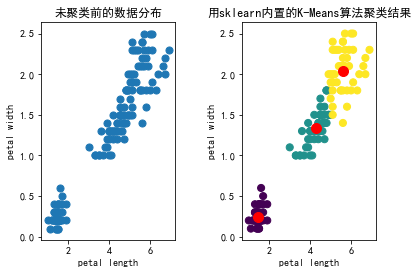

In [11]:
from  sklearn.cluster import KMeans

k=3  # 假设聚类为3类
# 构建模型
s=time.time()
km = KMeans(n_clusters=k) 
km.fit(X)
print("用sklearn内置的K-Means算法聚类耗时：",time.time()-s)

label_pred = km.labels_   # 获取聚类后的样本所属簇对应值
centroids = km.cluster_centers_  # 获取簇心

#绘制K-Means结果
# 未聚类前的数据分布
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title("未聚类前的数据分布")
plt.subplots_adjust(wspace=0.5)
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=label_pred, s=50, cmap='viridis')
# x0 = X[label_pred == 0]
# x1 = X[label_pred == 1]
# x2 = X[label_pred == 2]
# plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
# plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
# plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='o',s=100)
plt.xlabel('petal length')
plt.ylabel('petal width')
# plt.legend(loc=2)
plt.title("用sklearn内置的K-Means算法聚类结果")
plt.show()  

# 用算法原理编写K-Means算法

In [4]:
import numpy as np
def distEclud(vecA,vecB):
    """
    计算两个向量的欧式距离
    """
    return np.sqrt(np.sum(np.power(vecA-vecB,2)))

def randCent(dataSet,k):
    """
    随机生成k个点作为质心，其中质心均在整个数据数据的边界之内
    """
    n=dataSet.shape[1] # 获取数据的维度
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ = np.min(dataSet[:,j])
        rangeJ = np.float(np.max(dataSet[:,j])-minJ)
        centroids[:,j] = minJ+rangeJ*np.random.rand(k,1)
    return centroids

def kMeans(dataSet,k,distMeas=distEclud, createCent=randCent):
    """
    k-Means聚类算法,返回最终的k各质心和点的分配结果
    """
    m = dataSet.shape[0]  #获取样本数量
    # 构建一个簇分配结果矩阵，共两列，第一列为样本所属的簇类值，第二列为样本到簇质心的误差
    clusterAssment = np.mat(np.zeros((m,2)))
    # 1. 初始化k个质心
    centroids = createCent(dataSet,k) 
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            # 2. 找出最近的质心
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # 3. 更新每一行样本所属的簇
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:]=minIndex,minDist**2
        print(centroids) # 打印质心
        # 4. 更新质心
        for cent in range(k):
            ptsClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]] # 获取给定簇的所有点
            centroids[cent,:] = np.mean(ptsClust,axis=0) # 沿矩阵列的方向求均值
    return centroids,clusterAssment

[[1.23686413 2.21317598]
 [6.86161737 1.27707527]
 [4.82533221 1.54455875]]
[[1.462      0.246     ]
 [6.35454545 2.12727273]
 [4.72696629 1.62022472]]
[[1.49215686 0.2627451 ]
 [5.988      2.132     ]
 [4.56621622 1.52972973]]
[[1.462      0.246     ]
 [5.80285714 2.11142857]
 [4.42307692 1.44153846]]
[[1.462      0.246     ]
 [5.73333333 2.09487179]
 [4.37704918 1.40819672]]
[[1.462      0.246     ]
 [5.68333333 2.08095238]
 [4.34310345 1.38275862]]
[[1.462      0.246     ]
 [5.65227273 2.06818182]
 [4.31964286 1.36785714]]
[[1.462      0.246     ]
 [5.63777778 2.06      ]
 [4.30727273 1.36181818]]
[[1.462      0.246     ]
 [5.62608696 2.04782609]
 [4.29259259 1.35925926]]
用K-Means算法原理聚类耗时： 0.18351006507873535


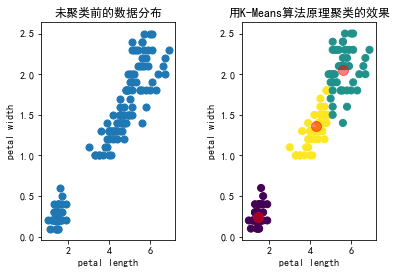

In [10]:
s=time.time()
myCentroids,clustAssing=kMeans(X,3)  # myCentroids为簇质心
print("用K-Means算法原理聚类耗时：",time.time()-s)
centroids=myCentroids.A # 将matrix转换为ndarray类型
# 获取聚类后的样本所属的簇值，将matrix转换为ndarray
y_kmeans=clustAssing[:,0].A[:,0]
# 未聚类前的数据分布
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title("未聚类前的数据分布")
plt.subplots_adjust(wspace=0.5)
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# x0 = X[np.nonzero(clustAssing[:,0]==0)[0]]
# x1 = X[np.nonzero(clustAssing[:,0]==1)[0]]
# x2 = X[np.nonzero(clustAssing[:,0]==2)[0]]
# plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
# plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
# plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel('petal length')
plt.ylabel('petal width')
# plt.legend(loc=2)
plt.title("用K-Means算法原理聚类的效果")
plt.show()  